# Mall Customers

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

mall = pd.read_csv("Mall_Customers.csv")

In [44]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [45]:
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [32]:
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


It is interesting to know how the features distributes according the gender. In the below, we define a function for performing that

In [46]:
def mall_chart(feature):
    male=mall[mall["Gender"]=="Male"][feature]
    female=mall[mall["Gender"]=="Female"][feature]
    df = pd.DataFrame([male,female])
    df.index = ['Male','Female']
    plt.figure(figsize=(10,5))
    sns.distplot(female,bins=30,kde=True,color="red")
    plt.title("Female")
    plt.figure(figsize=(10,5))
    sns.distplot(male,bins=30,kde=True,color="blue")
    plt.title("Male")
    

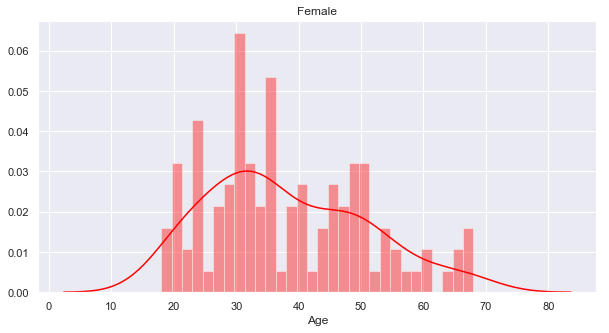

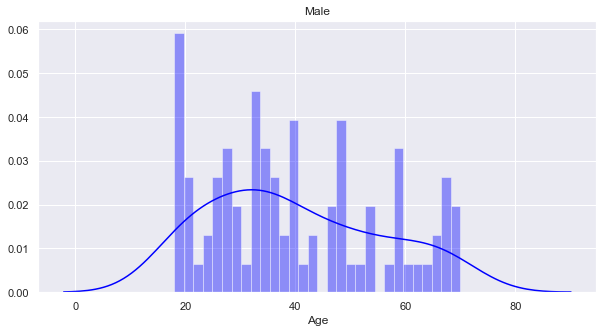

In [47]:
mall_chart("Age")

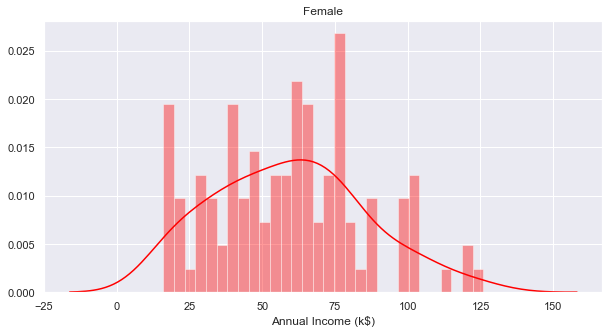

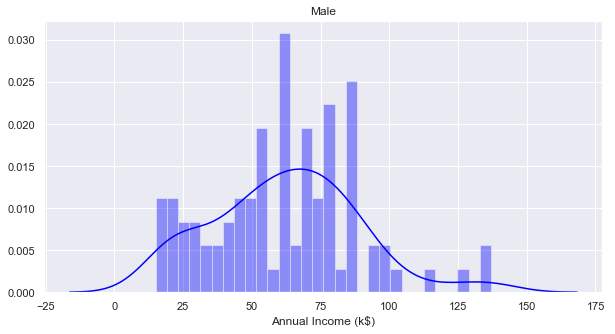

In [7]:
mall_chart("Annual Income (k$)")

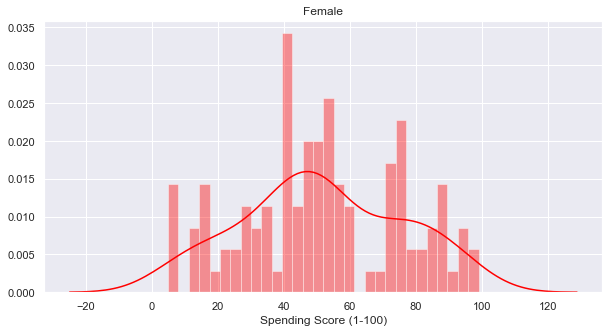

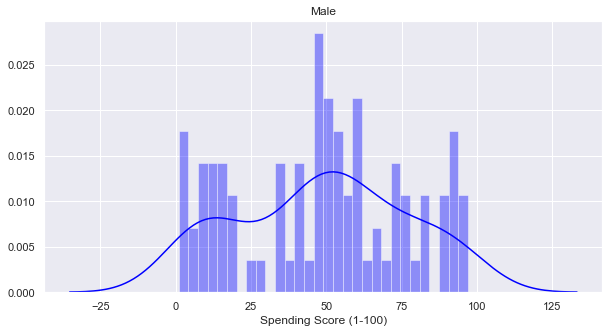

In [48]:
mall_chart("Spending Score (1-100)")

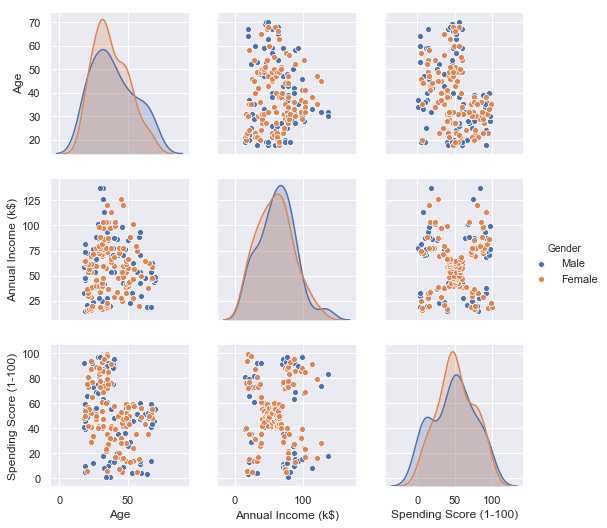

In [49]:
mall.drop("CustomerID",axis=1,inplace=True)
#plt.figure(figsize=(10,5))
sns.pairplot(mall, hue="Gender")

In [50]:
mall.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Clustering

### Elbow method

K-means is a simple unsupervised machine learning algorithm that groups a dataset into a user-specified number (k) of clusters. The algorithm is somewhat naive--it clusters the data into k clusters, even if k is not the right number of clusters to use. Therefore, when using k-means clustering, users need some way to determine whether they are using the right number of clusters.

One method to validate the number of clusters is the elbow method. The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 10)

In [51]:
from sklearn.cluster import KMeans
X=mall[['Annual Income (k$)','Spending Score (1-100)']].values
sse=[]

# range(1,30) is random selection because in our dataset there may not be more than 30 cluster (assumption)
for i in range(1,30):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

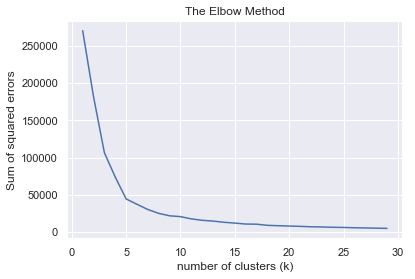

In [52]:
plt.plot(range(1,30), sse)
plt.title('The Elbow Method')
plt.xlabel('number of clusters (k)')
plt.ylabel('Sum of squared errors')
plt.show()


According the plot in the above, one finds that the "elbow" is for $n=5$

In [53]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

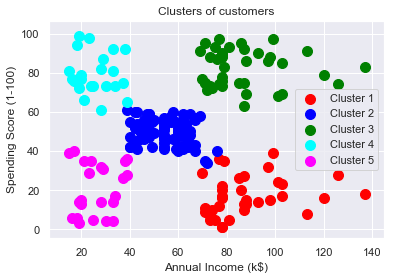

In [54]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


# Conclusion

We can see from the plot in the above that the Cluster 3 is our target set. That is, one has high Spending Score and high Annual Income.  

# Classification after clustering

In [55]:
mall["label_kmeans"] = y_kmeans
mall.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100),label_kmeans
0,Male,19,15,39,4
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,4


We have to change Gender for labels, e.g. male=1 and female=0.
Our target is the Cluster 3, the others are not interesting to us. Hence, let us label cluster 3 =1 others=0.
We have to normalize the data

In [56]:
gender_01=[1 if each=="Male" else 0 for each in mall["Gender"]]#converting male=1 and female=0.
gender_01_df=pd.DataFrame(data=gender_01,columns=["Gender"])
mall["Gender"]=gender_01_df["Gender"]

label_kmeans_01=[1 if each==3 else 0 for each in mall["label_kmeans"]]#converting cluster3=1 others=0.
label_kmeans_01_df=pd.DataFrame(data=label_kmeans_01,columns=["label_kmeans"])
mall["label_kmeans"]=label_kmeans_01_df["label_kmeans"]

mall.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),label_kmeans
0,1,19,15,39,0
1,1,21,15,81,1
2,0,20,16,6,0
3,0,23,16,77,1
4,0,31,17,40,0


In [57]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

y = mall["label_kmeans"].values
x = mall.drop(["label_kmeans"],axis=1)

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)

scaler = MinMaxScaler()# escala as features entre 0 e 1.

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [ ]:
seed = 7
scoring = 'accuracy'

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, y_train,cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


from sklearn import metrics

lr=LogisticRegression().fit(X_train,y_train)
prob_lr=lr.predict_proba(X_train)

lda=LinearDiscriminantAnalysis().fit(X_train,y_train)
prob_lda=lda.predict_proba(X_train)

knn=KNeighborsClassifier().fit(X_train,y_train)
prob_knn=knn.predict_proba(X_train)

cart=DecisionTreeClassifier().fit(X_train,y_train)
prob_cart=cart.predict_proba(X_train)

gnb=GaussianNB().fit(X_train,y_train)
prob_gnb=gnb.predict_proba(X_train)

svm=SVC(probability=True).fit(X_train,y_train)
prob_svm=svm.predict_proba(X_train)


#Compute the ROC curve: true positives/false positives

tpr_lr,fpr_lr,thresh_lr=metrics.roc_curve(y_train,prob_lr[:,0])
tpr_lda,fpr_lda,thresh_lda=metrics.roc_curve(y_train,prob_lda[:,0])
tpr_knn,fpr_knn,thresh_knn=metrics.roc_curve(y_train,prob_knn[:,0])
tpr_cart,fpr_cart,thresh_cart=metrics.roc_curve(y_train,prob_cart[:,0])
tpr_gnb,fpr_gnb,thresh_gnb=metrics.roc_curve(y_train,prob_gnb[:,0])
tpr_svm,fpr_svm,thresh_svm=metrics.roc_curve(y_train,prob_svm[:,0])

#Area under Curve (AUC)
from sklearn.metrics import auc

roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_lda = auc(fpr_lda, tpr_lda)
roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_cart = auc(fpr_cart, tpr_cart)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)
roc_auc_svm = auc(fpr_svm, tpr_svm)

#Plotting the ROC curves


plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR, ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_lda, tpr_lda, label='LDA, ROC curve (area = %0.2f)' % roc_auc_lda)
plt.plot(fpr_knn, tpr_knn, label='KNN, ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot(fpr_cart, tpr_cart, label='CART, ROC curve (area = %0.2f)' % roc_auc_cart)
plt.plot(fpr_gnb, tpr_gnb, label='NB, ROC curve (area = %0.2f)' % roc_auc_gnb)
plt.plot(fpr_svm, tpr_svm, label='SVC, ROC curve (area = %0.2f)' % roc_auc_svm)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# Make predictions on validation dataset
print("--------------------------")
print("LogisticRegression Report")
print("--------------------------")
predictions_lr = lr.predict(X_test)
print("accuracy =",accuracy_score(y_test, predictions_lr))
print("confusion matrix",confusion_matrix(y_test, predictions_lr))
print(classification_report(y_test, predictions_lr))

print("--------------------------")
print("LinearDiscriminantAnalysis Report")
print("--------------------------")
predictions_lda = lda.predict(X_test)
print("accuracy =",accuracy_score(y_test, predictions_lda))
print("confusion matrix",confusion_matrix(y_test, predictions_lda))
print(classification_report(y_test, predictions_lda))

print("--------------------------")
print("KNeighborsClassifier Report")
print("--------------------------")
predictions_knn = knn.predict(X_test)
print("accuracy =",accuracy_score(y_test, predictions_knn))
print("confusion matrix",confusion_matrix(y_test, predictions_knn))
print(classification_report(y_test, predictions_knn))

print("--------------------------")
print("DecisionTreeClassifier Report")
print("--------------------------")
predictions = cart.predict(X_test)
print("accuracy =",accuracy_score(y_test, predictions))
print("confusion matrix",confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

print("--------------------------")
print("GaussianNB Report")
print("--------------------------")
predictions_gnb = gnb.predict(X_test)
print("accuracy =",accuracy_score(y_test, predictions_gnb))
print("confusion matrix",confusion_matrix(y_test, predictions_gnb))
print(classification_report(y_test, predictions_gnb))

print("--------------------------")
print("SVC Report")
print("--------------------------")
predictions_svm = svm.predict(X_test)
print("accuracy =",accuracy_score(y_test, predictions_svm))
print("confusion matrix",confusion_matrix(y_test, predictions_svm))
print(classification_report(y_test, predictions_svm))

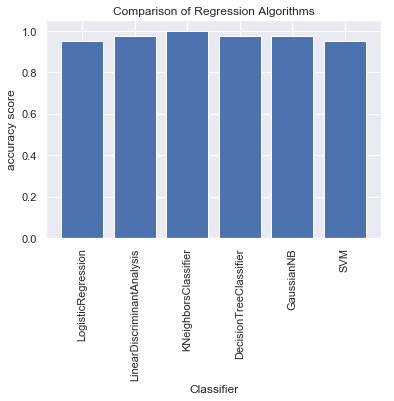

In [61]:
import numpy as np
y = np.array([accuracy_score(y_test, predictions_lr),accuracy_score(y_test, predictions_lda),accuracy_score(y_test, predictions_knn),accuracy_score(y_test, predictions),accuracy_score(y_test, predictions_gnb),accuracy_score(y_test, predictions_svm)])
x = ['LogisticRegression','LinearDiscriminantAnalysis','KNeighborsClassifier','DecisionTreeClassifier','GaussianNB','SVM']
plt.bar(x,y)
plt.title("Comparison of Regression Algorithms")
plt.xticks(rotation=90)
plt.xlabel("Classifier")
plt.ylabel("accuracy score")
plt.show()

Comments: KNN is the best Classifier